# Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the HAM10000_metadata.csv.
import pandas as pd 
metadata_df = pd.read_csv("HAM10000_metadata.csv")
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [2]:
# Drop the non-beneficial ID columns
metadata_df = metadata_df.drop(['dx_type'],axis=1)
metadata_df.head()

,lesion_id,image_id,dx,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear


In [3]:
# Determine the number of unique values in each column.
metadata_df.nunique()

lesion_id        7470
image_id        10015
dx                  7
age                18
sex                 3
localization       15
dtype: int64

In [4]:
# Look at dx counts for binning
dx_counts = metadata_df['dx'].value_counts()
dx_counts

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_dx = list(dx_counts[dx_counts < 1100].index)

# Replace in dataframe
for dx in replace_dx:
    metadata_df.dx = metadata_df.dx.replace(dx,"Other")
    
# Check to make sure binning was successful
metadata_df.dx.value_counts()

nv       6705
Other    2197
mel      1113
Name: dx, dtype: int64

<AxesSubplot:ylabel='Density'>

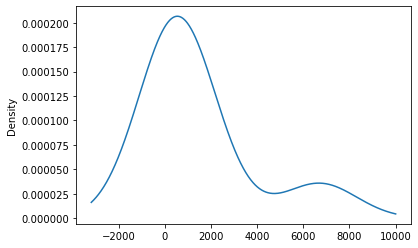

In [8]:
# Visualize the value counts of APPLICATION_TYPE
dx_counts.plot.density()

In [6]:
# Look at localization counts for binning
localization_counts = metadata_df['localization'].value_counts()
localization_counts

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_localization = list(localization_counts[localization_counts < 700].index)

# Replace in dataframe
for localization in replace_localization:
    metadata_df.localization = metadata_df.localization.replace(localization,"Other")
    
# Check to make sure binning was successful
metadata_df.localization.value_counts()

back               2192
lower extremity    2077
Other              1457
trunk              1404
upper extremity    1118
abdomen            1022
face                745
Name: localization, dtype: int64

<AxesSubplot:ylabel='Density'>

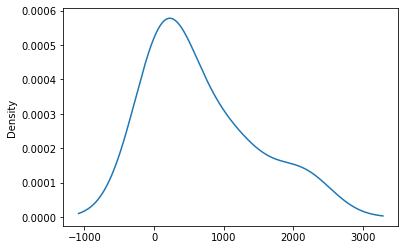

In [9]:
# Visualize the value counts of APPLICATION_TYPE
localization_counts.plot.density()

In [10]:
# Generate our categorical variable lists
metadata_cat = metadata_df.dtypes[metadata_df.dtypes == "object"].index.tolist()
metadata_cat

['lesion_id', 'image_id', 'dx', 'sex', 'localization']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(metadata_df[metadata_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(metadata_cat)
encode_df.head()

,lesion_id_HAM_0000000,lesion_id_HAM_0000001,lesion_id_HAM_0000002,lesion_id_HAM_0000003,lesion_id_HAM_0000004,lesion_id_HAM_0000005,lesion_id_HAM_0000006,lesion_id_HAM_0000007,lesion_id_HAM_0000008,lesion_id_HAM_0000009,...,sex_female,sex_male,sex_unknown,localization_Other,localization_abdomen,localization_back,localization_face,localization_lower extremity,localization_trunk,localization_upper extremity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
metadata_df = metadata_df.merge(encode_df,left_index=True, right_index=True)
metadata_df = metadata_df.drop(metadata_cat,axis=1)
metadata_df.head()

,age,lesion_id_HAM_0000000,lesion_id_HAM_0000001,lesion_id_HAM_0000002,lesion_id_HAM_0000003,lesion_id_HAM_0000004,lesion_id_HAM_0000005,lesion_id_HAM_0000006,lesion_id_HAM_0000007,lesion_id_HAM_0000008,...,sex_female,sex_male,sex_unknown,localization_Other,localization_abdomen,localization_back,localization_face,localization_lower extremity,localization_trunk,localization_upper extremity
0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = metadata_df['dx_mel'].values
X = metadata_df.drop(['dx_mel'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78,stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train, and Evaluate the Model